## Name: Anshul Sahu
## Roll No.: A2-29
## Practiccal 9 - DL Mini Project

## Import Required Libraries


In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

## Load Dataset with ImageDataGenerator

In [74]:
# Set dataset path (adjust if needed)
dataset_path = "/content/drive/MyDrive/archive"  # Change to your uploaded path

# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow training images
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Flow validation images
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


##  Model 1: CNN From Scratch

In [4]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = cnn_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.4829 - loss: 1.0497 - val_accuracy: 0.5000 - val_loss: 0.6855
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5362 - loss: 0.6820 - val_accuracy: 0.6150 - val_loss: 0.6700
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6205 - loss: 0.6573 - val_accuracy: 0.6950 - val_loss: 0.6203
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7550 - loss: 0.5539 - val_accuracy: 0.6200 - val_loss: 0.6701
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.7925 - loss: 0.4685 - val_accuracy: 0.6600 - val_loss: 0.6595
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8477 - loss: 0.3695 - val_accuracy: 0.6750 - val_loss: 0.7891
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.8556 - loss: 0.3079 - val_accuracy: 0.6200 - val_loss: 0.9770
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9166 - loss: 0.2149 - val_accuracy: 0.6250 - val_loss

## Model 2: Transfer Learning (VGG16)

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base model

tl_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

tl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

history_tl = tl_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 11s/step - accuracy: 0.5724 - loss: 1.7207 - val_accuracy: 0.8000 - val_loss: 0.4476
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 279s 11s/step - accuracy: 0.8676 - loss: 0.3053 - val_accuracy: 0.8750 - val_loss: 0.3620
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 269s 11s/step - accuracy: 0.9385 - loss: 0.1936 - val_accuracy: 0.8600 - val_loss: 0.3799
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 270s 11s/step - accuracy: 0.9553 - loss: 0.1297 - val_accuracy: 0.8650 - val_loss: 0.3889
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 296s 12s/step - accuracy: 0.9811 - loss: 0.0878 - val_accuracy: 0.8600 - val_loss: 0.4099
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 297s 12s/step - accuracy: 0.9939 - loss: 0.0561 - val_accuracy: 0.8800 - val_loss: 0.4138
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 296s 12s/step - accuracy: 0.9991 - loss: 0.0354 - val_accuracy: 0.8750 - val_loss: 0.4383
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 269s 11s/step -

## Plot Results

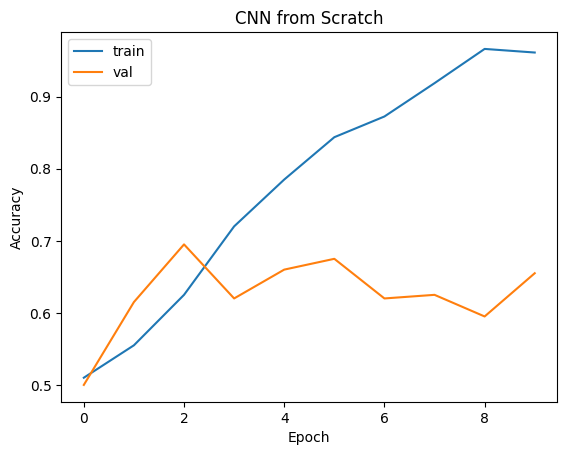

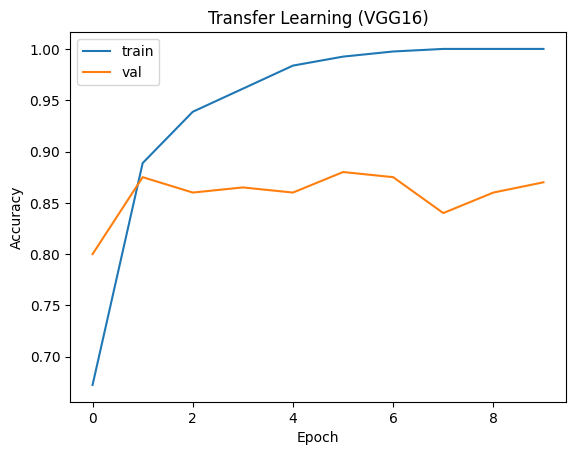

In [6]:
def plot_accuracy(hist, title):
    plt.plot(hist.history['accuracy'], label='train')
    plt.plot(hist.history['val_accuracy'], label='val')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_cnn, 'CNN from Scratch')
plot_accuracy(history_tl, 'Transfer Learning (VGG16)')

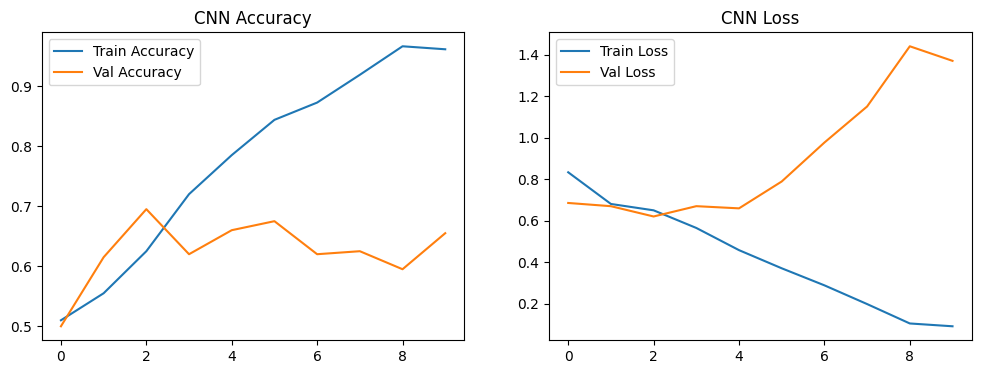

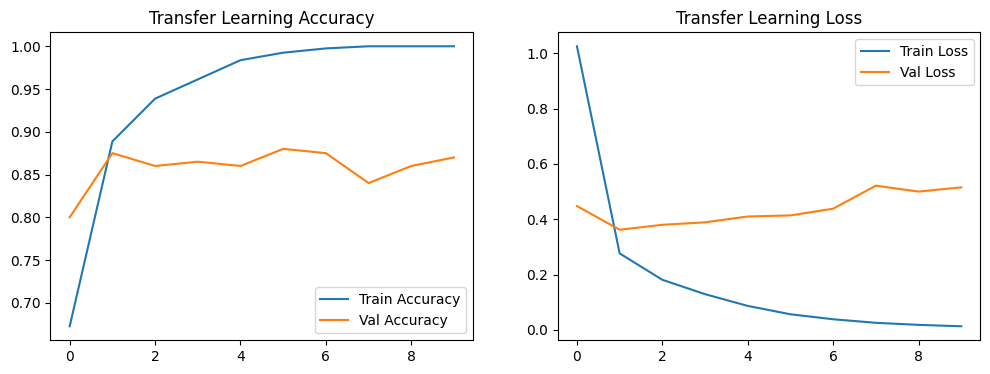

In [75]:
def plot_accuracy_loss(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

plot_accuracy_loss(history_cnn, "CNN")
plot_accuracy_loss(history_tl, "Transfer Learning")

## Predicting Dog Image and their accuracy

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

def predict_image(model, img_path):
    if not os.path.exists(img_path):
        print("❌ Image path does not exist.")
        return

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    print("🔍 Predicting...")
    prediction = model.predict(img_array_expanded, verbose=0)[0][0]  # Output between 0 and 1

    # FIX: Ensure correct class mapping
    class_labels = {0: 'cat', 1: ' dog'}
    predicted_class_index = 1 if prediction > 0.5 else 0
    predicted_class_label = class_labels[predicted_class_index]

    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_label} ({prediction:.2f}%) ")
    plt.show()

    # Print prediction
    print(f"✅ Raw model prediction: {prediction:.4f}")
    print(f"It's a {'🐱 cat' if predicted_class_index == 0 else '🐶 dog'}")


🔍 Predicting...


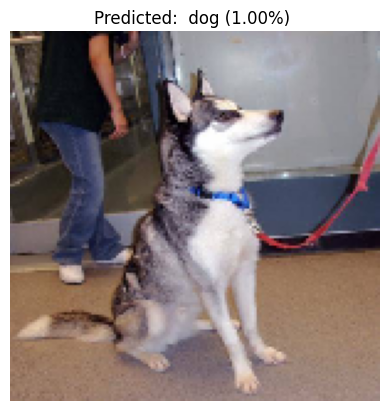

✅ Raw model prediction: 0.9991
It's a 🐶 dog


In [100]:
predict_image(cnn_model, '/content/drive/MyDrive/archive/dogs_set/dog.4001.jpg')

## Predicting Cat image and their accuracy

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

def predict_image(model, img_path):
    if not os.path.exists(img_path):
        print("❌ Image path does not exist.")
        return

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array_expanded = np.expand_dims(img_array, axis=0)

    print("🔍 Predicting...")
    prediction = model.predict(img_array_expanded, verbose=0)[0][0]  # sigmoid output

    # 🧠 Correct class mapping: 0 = cat, 1 = dog
    if prediction > 0.5:
        predicted_class_label = "cat"
        emoji = "🐱"
    else:
        predicted_class_label = "dog"
        emoji = "🐶"

    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_label} ({prediction:.2f}%)")
    plt.show()

    # Print prediction
    print(f"✅ Raw model prediction: {prediction:.4f}")
    print(f"It's a {emoji} {predicted_class_label}")

🔍 Predicting...


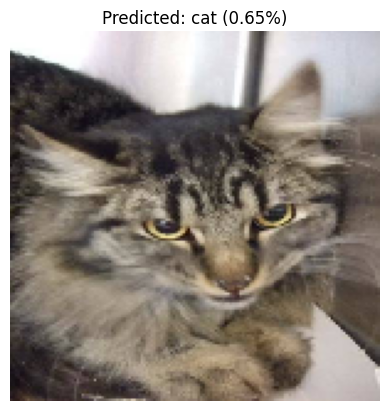

✅ Raw model prediction: 0.6541
It's a 🐱 cat


In [109]:
predict_image(cnn_model, '/content/drive/MyDrive/archive/cats_set/cat.4099.jpg')